### Consumer Electronics Sales Forecasting

##### *Focus: Sales forecasting for Fast Moving Consumer Electronics to Optimize Inventory and Maximize Profitability*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Amdari\ElectroTech-Sales-Forecast\EDA\cleaned_data.csv')

In [5]:
print(df.head())

   Product_ID    Category   Price        Date  Season  Market_Trend_Index  \
0        1103      Laptop  105.32  2009-01-01  Winter           -1.859160   
1        1436      Tablet  145.55  2009-01-01  Winter           -0.345587   
2        1271  Smartphone   97.82  2009-01-01  Winter           -0.384738   
3        1107      Laptop   64.00  2009-01-01  Winter            0.716763   
4        1072      Tablet   67.83  2009-01-01  Winter           -0.242074   

   Competitor_Activity_Score  Consumer_Confidence_Index  \
0                   0.546694                  84.680465   
1                   0.940428                  42.919288   
2                   0.751155                  55.191268   
3                   0.125939                  88.746454   
4                  -0.412932                  67.947536   

  Product_Specification_1 Product_Specification_2  Sales_Volume  
0                  Spec_C       Long-Battery-Life            49  
1                  Spec_C             Lightweight 

In [6]:
df.columns

Index(['Product_ID', 'Category', 'Price', 'Date', 'Season',
       'Market_Trend_Index', 'Competitor_Activity_Score',
       'Consumer_Confidence_Index', 'Product_Specification_1',
       'Product_Specification_2', 'Sales_Volume'],
      dtype='object')

In [7]:
#Quick statistics overview
df.describe(exclude=['object']).iloc[0:,1:]

,Price,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Sales_Volume
count,136193.000000,136193.000000,136193.000000,136193.000000,136193.000000
mean,106.812513,-0.000277,-0.000656,70.013109,122.305140
std,36.419229,1.009105,1.001551,14.733722,54.320849
min,40.510000,-4.067055,-4.181590,40.044830,6.000000
25%,75.560000,-0.683015,-0.676466,57.521063,81.000000
50%,104.710000,0.001093,0.000555,70.022715,119.000000
75%,138.310000,0.680506,0.674953,82.569582,161.000000
max,181.800000,4.728391,4.661979,99.926291,306.000000


In [8]:
df['Date']= pd.to_datetime(df['Date'])

In [9]:
print(f"\Date Range: from {df['Date'].min()} to {df['Date'].max()}")

\Date Range: from 2009-01-01 00:00:00 to 2020-12-30 00:00:00


In [10]:
df['Year']=df['Date'].dt.year

In [11]:
df['Month']=df['Date'].dt.month_name()

In [12]:
df

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume,Year,Month
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49,2009,January
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69,2009,January
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50,2009,January
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28,2009,January
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81,2009,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162,2020,December
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161,2020,December
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182,2020,December
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287,2020,December


In [13]:
sales_volume_by_cat = df.groupby(['Date','Category']).sum()['Sales_Volume'].reset_index()


In [14]:
df

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume,Year,Month
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49,2009,January
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69,2009,January
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50,2009,January
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28,2009,January
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81,2009,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136188,1361,Tablet,97.73,2020-12-29,Winter,0.953956,-0.555596,69.407099,Spec_C,High-Resolution,162,2020,December
136189,1147,Tablet,173.21,2020-12-29,Winter,-0.781121,0.323828,90.737931,Spec_B,Long-Battery-Life,161,2020,December
136190,1405,Accessories,154.62,2020-12-30,Winter,-0.210343,-1.055552,53.747320,Spec_A,Long-Battery-Life,182,2020,December
136191,1329,Smartphone,152.00,2020-12-30,Winter,-0.492417,-1.064359,88.582224,Spec_A,Long-Battery-Life,287,2020,December


In [15]:
sales_volume_by_smartphone =sales_volume_by_cat[sales_volume_by_cat['Category'] == 'Smartphone'] 

In [16]:
sales_volume_by_smartphone

,Date,Category,Sales_Volume
2,2009-01-01,Smartphone,564
6,2009-01-02,Smartphone,99
10,2009-01-03,Smartphone,315
14,2009-01-04,Smartphone,344
18,2009-01-05,Smartphone,166
...,...,...,...
17439,2020-12-26,Smartphone,141
17443,2020-12-27,Smartphone,1345
17447,2020-12-28,Smartphone,3692
17451,2020-12-29,Smartphone,1744


#### *Visualise trend for each product Category*
This is to simply identify trend in sales for different period with high sales volume per product category

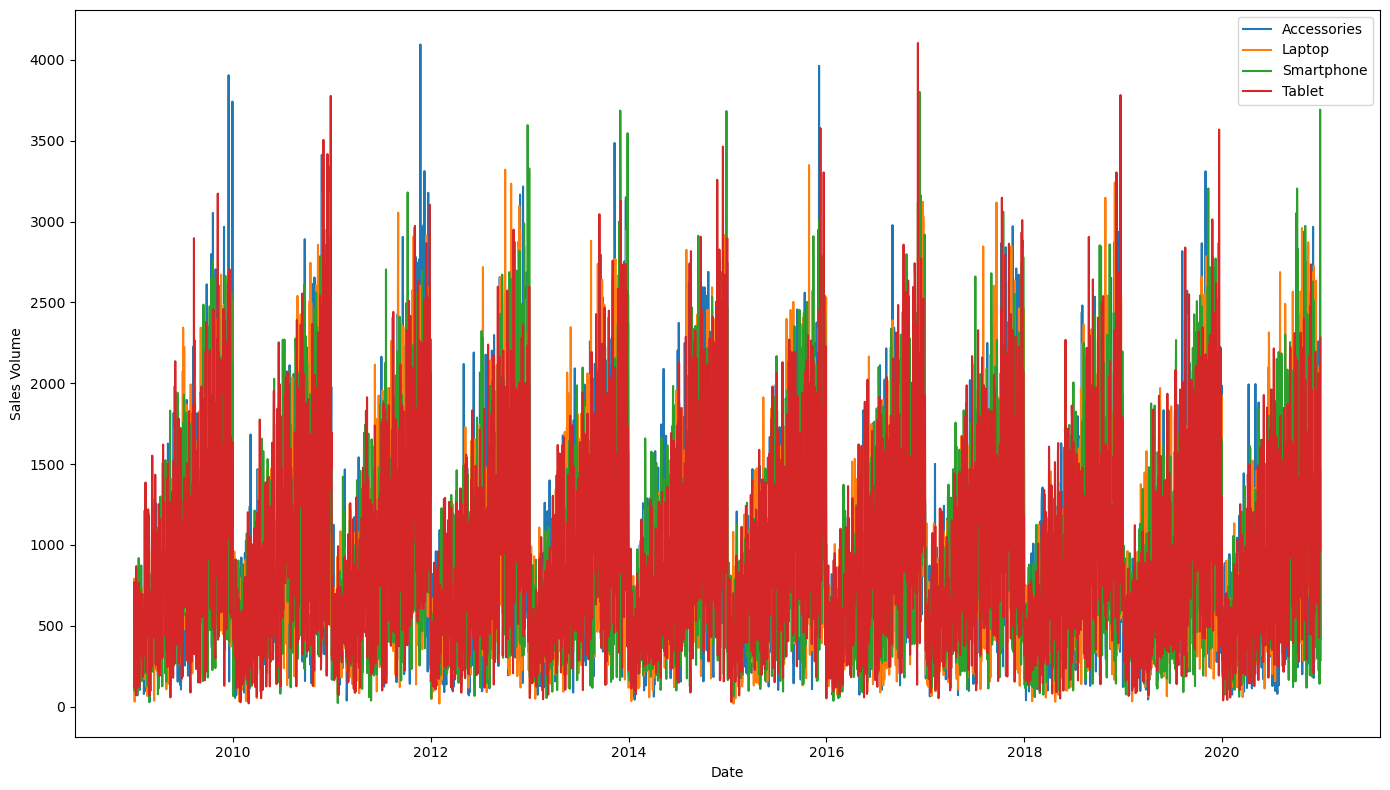

In [17]:
plt.figure(figsize=[14, 8])
for cat in sales_volume_by_cat['Category'].unique().tolist():
    subset = sales_volume_by_cat[sales_volume_by_cat['Category'] == cat]
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'], label=cat)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.tight_layout()
plt.show()



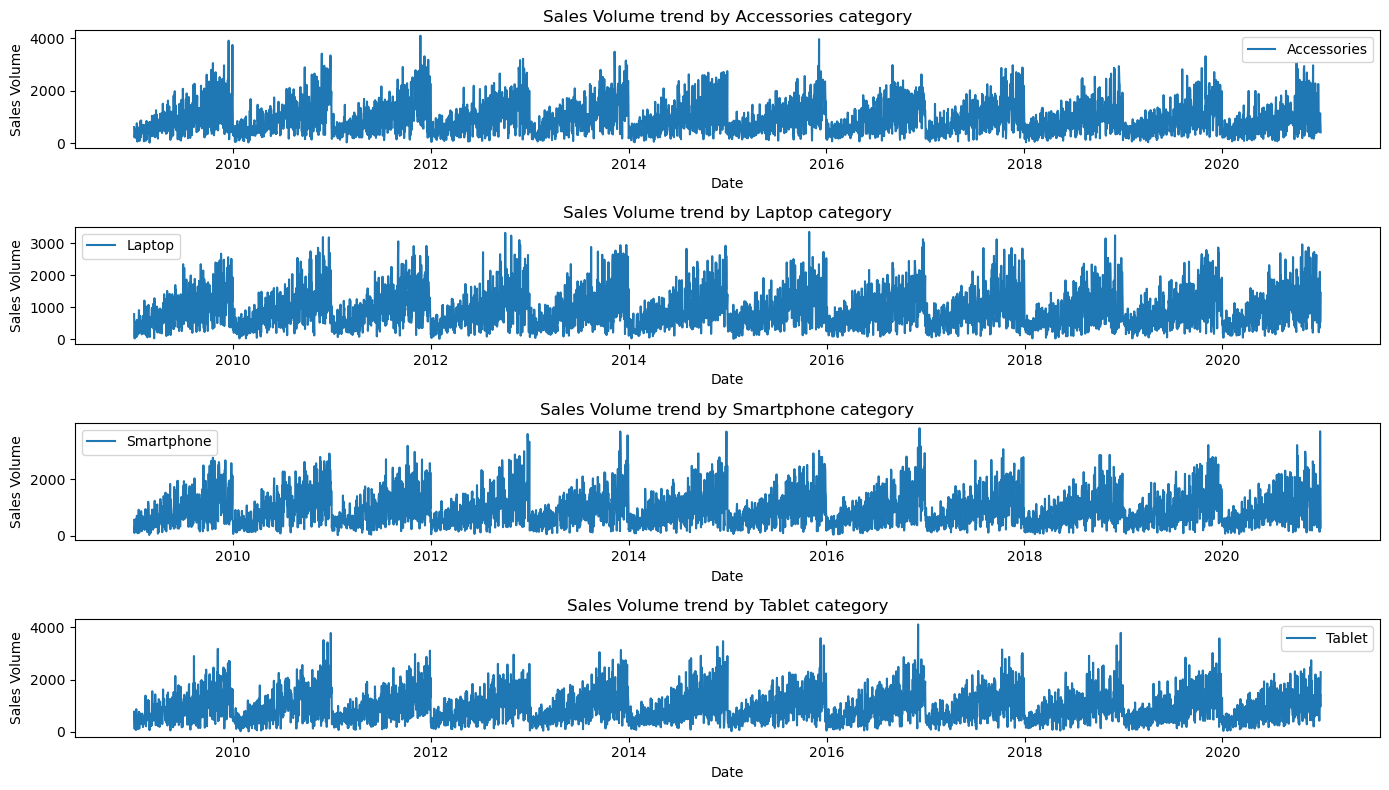

In [18]:
cat_ = len(sales_volume_by_cat['Category'].unique())

plt.figure(figsize=[14,8])
for i, cat in enumerate(sales_volume_by_cat['Category'].unique().tolist()):
    plt.subplot(4,1, i+1)
    subset = sales_volume_by_cat[sales_volume_by_cat['Category'] == cat]
    plt.plot(pd.to_datetime(subset['Date']), subset['Sales_Volume'], label=cat)
    plt.title(f'Sales Volume trend by {cat} category')

    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.tight_layout()
plt.show()

#### *Identify the sales pattern on monthly perspective*
- Group sales Category on Sales by month
- Visualise the trend to extract hidden pattern

In [19]:
sales_volume_by_cat['Date'] = pd.to_datetime(sales_volume_by_cat['Date'])
sales_volume_by_cat_by_month = sales_volume_by_cat.copy()
sales_volume_by_cat_by_month['Date'] = sales_volume_by_cat_by_month['Date'].dt.to_period('M')
sales_volume_by_cat_by_month

,Date,Category,Sales_Volume
0,2009-01,Accessories,619
1,2009-01,Laptop,790
2,2009-01,Smartphone,564
3,2009-01,Tablet,768
4,2009-01,Accessories,227
...,...,...,...
17450,2020-12,Laptop,1456
17451,2020-12,Smartphone,1744
17452,2020-12,Tablet,2282
17453,2020-12,Accessories,421


In [ ]:
sales_volume_by_cat_by_month=sales_volume_by_cat_by_month.groupby(['Date','Category'])['Sales_Volume'].sum().reset_index()
sales_volume_by_cat_by_month

,Date,Category,Sales_Volume
0,2009-01,Accessories,11762
1,2009-01,Laptop,11989
2,2009-01,Smartphone,12192
3,2009-01,Tablet,12491
4,2009-02,Accessories,12086
...,...,...,...
571,2020-11,Tablet,38059
572,2020-12,Accessories,30717
573,2020-12,Laptop,37869
574,2020-12,Smartphone,40987


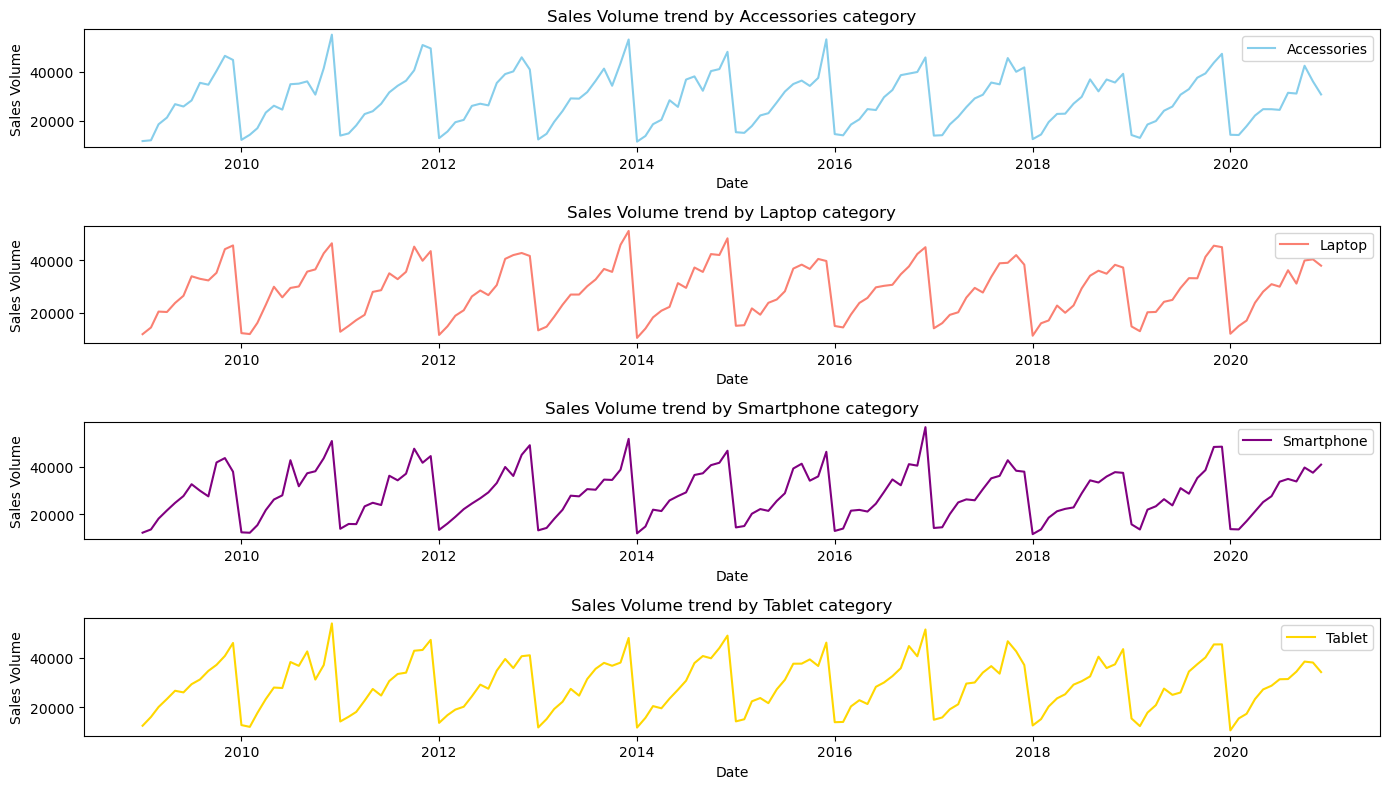

In [29]:
colors = {
    'Accessories': 'skyblue',
    'Laptop': 'salmon',
    'Smartphone': 'purple',
    'Tablet': 'gold'
}

plt.figure(figsize=[14, 8])

for i, cat in enumerate(sales_volume_by_cat_by_month['Category'].unique().tolist()):
    plt.subplot(4, 1, i + 1)
    subset = sales_volume_by_cat_by_month[sales_volume_by_cat_by_month['Category'] == cat].copy()
    subset['Date'] = subset['Date'].dt.to_timestamp()

    plt.plot(subset['Date'], subset['Sales_Volume'], label=cat, color=colors.get(cat, 'grey'))
    plt.title(f'Sales Volume trend by {cat} category')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()

plt.tight_layout()
plt.show()

#### *Analysis On the Market Trend Index: Visualise the Trend Index across periods for each product category*
- A Market Trend Index is a numerical or categorical indicator used to represent the overall direction, behavior, or sentiment of a market over a specific period of time.
  

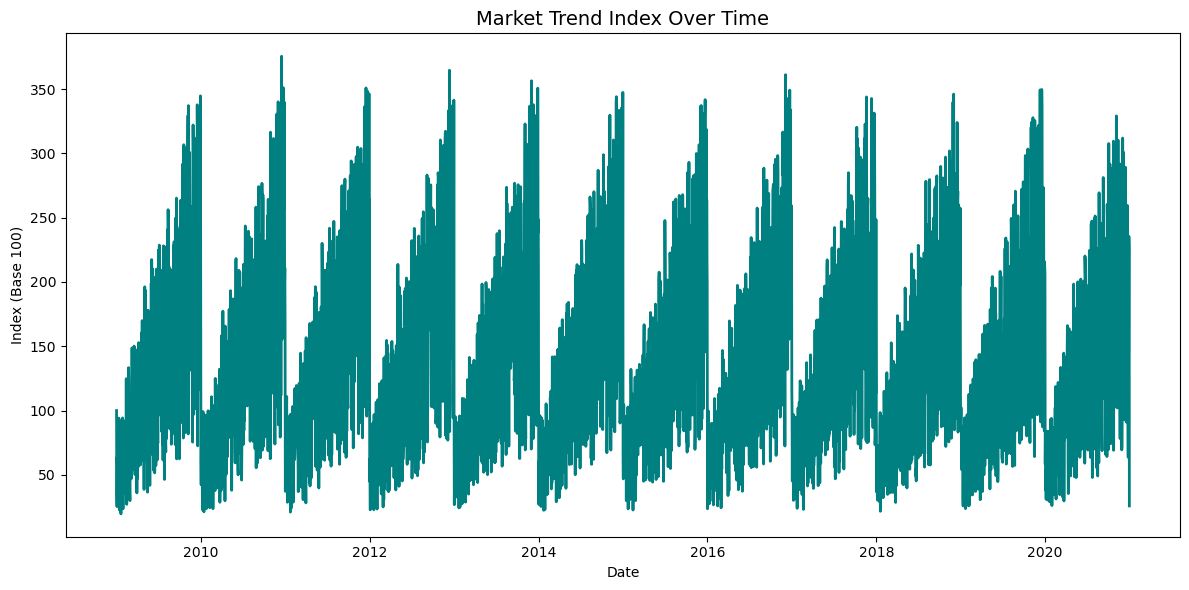

In [ ]:
market_trend = df.copy()


market_trend['Date'] = pd.to_datetime(market_trend['Date'])

trend_by_date = market_trend.groupby('Date')['Sales_Volume'].sum().reset_index()

# Normalize to create index (base = 100 at first month)
trend_by_date['Market_Trend_Index'] = (
    trend_by_date['Sales_Volume'] / trend_by_date['Sales_Volume'].iloc[0] * 100
)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(trend_by_date['Date'], trend_by_date['Market_Trend_Index'], color='teal', linewidth=2)
plt.title('Market Trend Index Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Index (Base 100)')

plt.tight_layout()
plt.show()

#### *Analysis on Competitor Activity Score: Visualise the activity across the periods for each product category*
- This is simply to identify the product sales seasonality trend of our competitor
- A Competitor Activity score is a numerical representation that reflects how active or aggressive company's competitors are in the market during a specific time

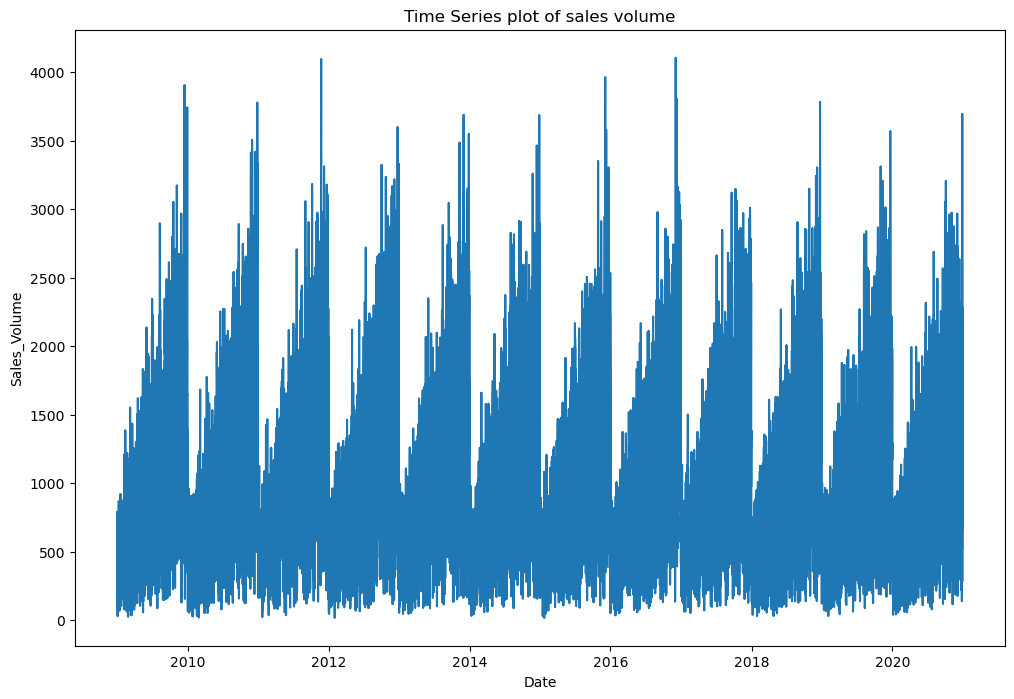

In [ ]:
#plot sales volume by category and season
plt.figure(figsize=(12,8))
plt.plot(sales_volume_by_cat['Date'], sales_volume_by_cat['Sales_Volume'])
plt.title('Time Series plot of sales volume')
plt.xlabel('Date')
plt.ylabel('Sales_Volume')
plt.show()

In [ ]:
category_colors = {
    'Accessories': 'skyblue',
    'Laptop': 'salmon',
    'Smartphone': 'purple',
    'Tablet': 'gold'
}

<Axes: title={'center': 'Monthly Sales Volume by Category'}, xlabel='Units Sold', ylabel='Month'>

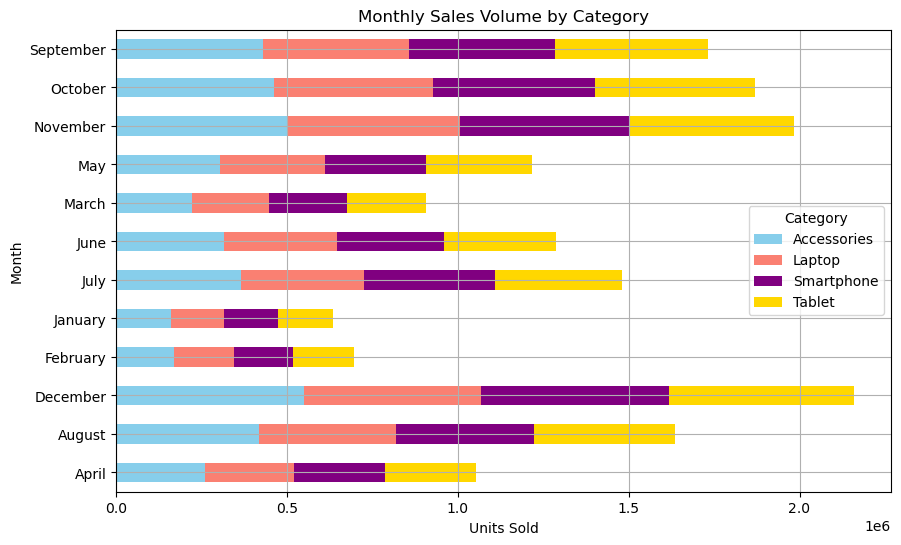

In [ ]:

pivot_df = sales_volume_by_cat.pivot(index='Month', columns='Category', values='Sales_Volume').fillna(0)

pivot_df.plot.barh(
    stacked=True,
    figsize=(10, 6),
    color=[category_colors[col] for col in pivot_df.columns],
    title='Monthly Sales Volume by Category',
    xlabel='Units Sold',
    ylabel='Month',
    grid=True
)

<Axes: title={'center': 'Monthly Sales Volume by Category'}, xlabel='Month', ylabel='Units Sold'>

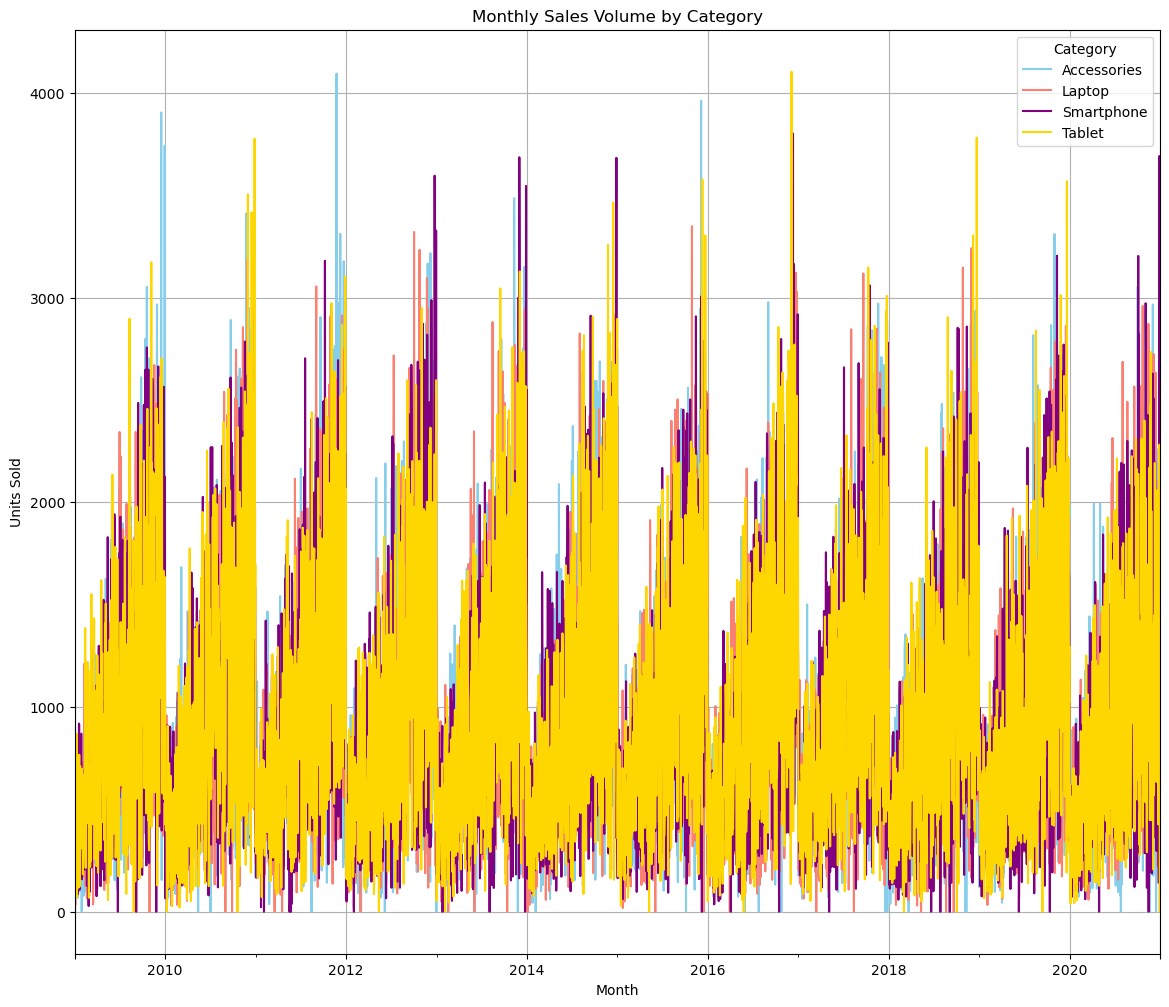

In [ ]:
pivot_df = sales_volume_by_cat.pivot(index='Date', columns='Category', values='Sales_Volume').fillna(0)

pivot_df.plot.line(
    figsize=(14, 12),
    color=[category_colors[col] for col in pivot_df.columns],
    title='Monthly Sales Volume by Category',
    xlabel='Month',
    ylabel='Units Sold',
    grid=True
)

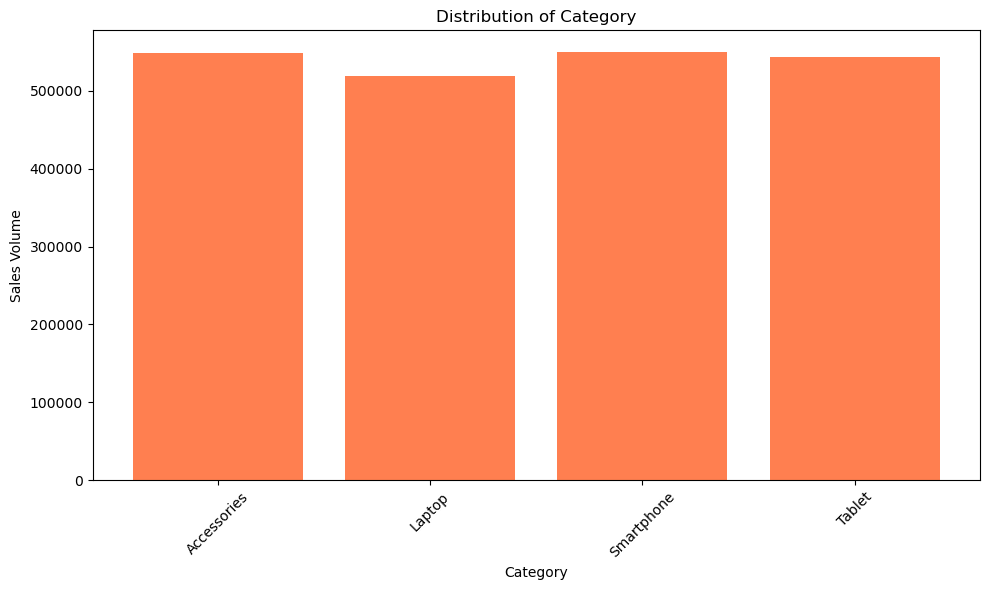

In [ ]:
#A plot of the category

plt.figure(figsize=(10,6))
plt.bar(sales_volume_by_cat['Category'], sales_volume_by_cat['Sales_Volume'], color='coral')
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
